In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('netflix_data.xlsx')
data.head()

,Date,Open,High,Low,Close,Volume
0,2025-04-25,1097.04,1106.80,1091.00,1101.53,3946400
1,2025-04-24,1048.00,1101.00,1047.02,1096.87,6381900
2,2025-04-23,1047.22,1061.25,1032.00,1049.59,6471900
3,2025-04-22,1005.30,1064.97,1004.52,1040.34,9368900
4,2025-04-21,984.40,1019.00,973.05,987.91,9775700


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())


         Date      Open      High       Low     Close    Volume
0  2025-04-25  1.000000  1.000000  1.000000  1.000000  0.177306
1  2025-04-24  0.910706  0.989400  0.919561  0.991541  0.343894
2  2025-04-23  0.909286  0.916752  0.892090  0.905716  0.350050
3  2025-04-22  0.832957  0.923551  0.841829  0.888925  0.548205
4  2025-04-21  0.794902  0.839535  0.784271  0.793752  0.576030


In [6]:
import pickle
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [8]:
df=data.copy()
df['High_Low'] = df['High'] - df['Low']
df['Open_Close'] = df['Open'] - df['Close']
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

df = df.dropna()
df.to_csv('netflix_preprocessed.csv', index=False)

df.head()

,Date,Open,High,Low,Close,Volume,High_Low,Open_Close,Target
0,2025-04-25,1.000000,1.000000,1.000000,1.000000,0.177306,0.000000,0.000000,0
1,2025-04-24,0.910706,0.989400,0.919561,0.991541,0.343894,0.069839,-0.080834,0
2,2025-04-23,0.909286,0.916752,0.892090,0.905716,0.350050,0.024662,0.003570,0
3,2025-04-22,0.832957,0.923551,0.841829,0.888925,0.548205,0.081722,-0.055968,0
4,2025-04-21,0.794902,0.839535,0.784271,0.793752,0.576030,0.055264,0.001150,0


In [9]:

target_counts = df['Target'].value_counts()
print("Target Class Distribution:\n", target_counts)
print("\nPercentage of each class:\n", target_counts / len(df) * 100)


Target Class Distribution:
 Target
0    139
1    111
Name: count, dtype: int64

Percentage of each class:
 Target
0    55.6
1    44.4
Name: count, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

df = pd.read_csv('netflix_preprocessed.csv')

X = df[['Close', 'High_Low', 'Open_Close', 'Volume']]
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


joblib.dump(model, 'netflix_model.pkl')


Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.82      0.95      0.88        19

    accuracy                           0.90        50
   macro avg       0.89      0.91      0.90        50
weighted avg       0.91      0.90      0.90        50



['netflix_model.pkl']

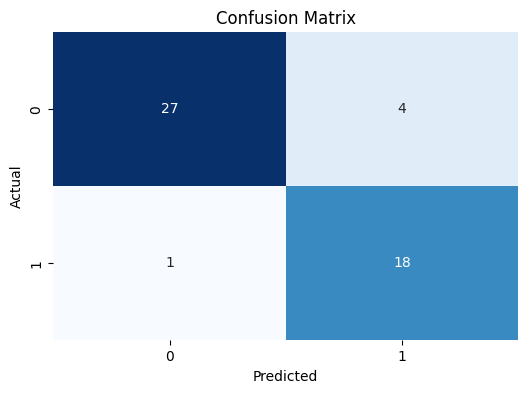

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save it for README
plt.show()
